<a href="https://colab.research.google.com/github/qwe030609/IBM_data_science/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this api can fetch detailed COVID-19 info for different country
import requests

url = "https://covid-19-coronavirus-statistics.p.rapidapi.com/v1/stats"

querystring = {"country":"USA"}

headers = {
    'x-rapidapi-host': "covid-19-coronavirus-statistics.p.rapidapi.com",
    'x-rapidapi-key': "90c7f23ce8msh9d7434369bbec92p126cfdjsna8bc48c515cb"
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

In [0]:
import requests

url = "https://coronavirus-monitor.p.rapidapi.com/coronavirus/cases_by_country.php"

headers = {
    'x-rapidapi-host': "coronavirus-monitor.p.rapidapi.com",
    'x-rapidapi-key': "90c7f23ce8msh9d7434369bbec92p126cfdjsna8bc48c515cb"
    }

response = requests.request("GET", url, headers=headers)

print(response.text)

['[{"country_name":"China","cases":"81,054","deaths":"3,261","region":"","total_recovered":"72,440","new_deaths":"6","new_cases":"46","serious_critical":"1,845","active_cases":"5,353","total_cases_per_1m_population":"56"},{"country_name":"Italy","cases":"53,578","deaths":"4,825","region":"","total_recovered":"6,072","new_deaths":"0","new_cases":"0","serious_critical":"2,857","active_cases":"42,681","total_cases_per_1m_population":"886"},{"country_name":"USA","cases":"26,878","deaths":"348","region":"","total_recovered":"182","new_deaths":"46","new_cases":"2,671","serious_critical":"708","active_cases":"26,348","total_cases_per_1m_population":"81"},{"country_name":"Spain","cases":"25,496","deaths":"1,381","region":"","total_recovered":"2,125","new_deaths":"0","new_cases":"0","serious_critical":"1,612","active_cases":"21,990","total_cases_per_1m_population":"545"},{"country_name":"Germany","cases":"22,364","deaths":"84","region":"","total_recovered":"209","new_deaths":"0","new_cases":"0"

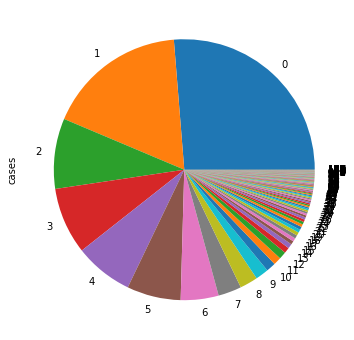

In [18]:
# online COVID-19 API from: https://rapidapi.com/astsiatsko/api/coronavirus-monitor/details
import http.client
import re
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as plt
from matplotlib import pyplot

conn = http.client.HTTPSConnection("coronavirus-monitor.p.rapidapi.com")

headers = {
    'x-rapidapi-host': "coronavirus-monitor.p.rapidapi.com",
    'x-rapidapi-key': "90c7f23ce8msh9d7434369bbec92p126cfdjsna8bc48c515cb"
    }

conn.request("GET", "/coronavirus/cases_by_country.php", headers=headers)

res = conn.getresponse()
data = res.read()
data = data.decode("utf-8")

# use regular expression to fetch data
data = re.findall("\[.*\]", data)
covid_country_name = re.findall(r'"country.*?":"(.*?)"', data[0])
covid_cases = re.findall(r'"cases.*?":"(.*?)"', data[0])
covid_deaths = re.findall(r'"death.*?":"(.*?)"', data[0])
covid_total_recovered = re.findall(r'"total_recovered.*?":"(.*?)"', data[0])
covid_new_deaths = re.findall(r'"new_deaths.*?":"(.*?)"', data[0])
covid_new_cases = re.findall(r'"new_cases.*?":"(.*?)"', data[0])
covid_serious_critical = re.findall(r'"serious_critical.*?":"(.*?)"', data[0])
covid_active_cases = re.findall(r'"active_cases.*?":"(.*?)"', data[0])
covid_total_cases_per_1m_population = re.findall(r'"total_cases_per_1m_population.*?":"(.*?)"', data[0])

def comma_parser(covid_data):
  # get rid of the comma in the numbers
  for loc, cases in enumerate(covid_data):
    case = re.findall('[0-9]+' ,cases)
    case = "".join(case)
    covid_data[loc] = case  
  return covid_data

# parsing all numerical data with comma_parser 
covid_cases = comma_parser(covid_cases)
covid_deaths = comma_parser(covid_deaths)
covid_total_recovered = comma_parser(covid_total_recovered)
covid_new_deaths = comma_parser(covid_new_deaths)
covid_new_cases = comma_parser(covid_new_cases)
covid_serious_critical = comma_parser(covid_serious_critical)
covid_active_cases = comma_parser(covid_active_cases)
covid_total_cases_per_1m_population = comma_parser(covid_total_cases_per_1m_population)

# print all parsed data 
print(data)
print(covid_country_name)
print(covid_cases)
print(covid_deaths)
print(covid_total_recovered)
print(covid_new_deaths)
print(covid_new_cases)
print(covid_serious_critical)
print(covid_active_cases)
print(covid_total_cases_per_1m_population)

# convert str to int datatype
# covid_total_cases_per_1m_population = [int(i) for i in covid_total_cases_per_1m_population]
# covid_total_cases_per_1m_population = list(map(int, covid_total_cases_per_1m_population))
# print(covid_total_cases_per_1m_population)

# culumns for the dataset
titles = ["country_name","cases","deaths","total_recovered","new_deaths","new_cases","serious_critical","active_cases","total_cases_per_1m_population"]
titles_counts = len(titles)
# titles_counts

# create dataframes for the data
# both lists, with columns specified 
df = pd.DataFrame(list(zip(covid_country_name, covid_cases, covid_deaths, covid_total_recovered, covid_new_deaths, 
                           covid_new_cases, covid_serious_critical, covid_active_cases, covid_total_cases_per_1m_population)), columns = titles) 

# show five rows of data
df.head()

# check datatype
print("\ndatatype before conversion:\n", df.dtypes)

# datatype convert object (str) to int
df[[title for title in titles[1:]]] = df[[title for title in titles[1:]]].astype('int')
print("\ndatatype after conversion:\n", df.dtypes)

# check the dtype of the dataset
# df.info()

# statistical info
df.describe()

# plot for counts using histogram 
%matplotlib inline
# plt.pyplot.hist(df["cases"])
series = df["cases"]
series.plot.pie(figsize=(6, 6))

# set x/y labels and plot title
# plt.pyplot.xlabel("countries")
# plt.pyplot.ylabel("cases_count")
# plt.pyplot.title("cases in countries")
